- 데이터 :  house.csv
- 모델 : decision Tree
- 목표 : 최고의 feature찾기(?)

In [5]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
data = '../data/HousingData.csv'
hsDF = pd.read_csv(data)

In [6]:
hsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
# 상관계수 출력
abs(hsDF.corr())['MEDV'].sort_values(ascending=False).head(4)

MEDV       1.000000
LSTAT      0.735822
RM         0.695360
PTRATIO    0.507787
Name: MEDV, dtype: float64

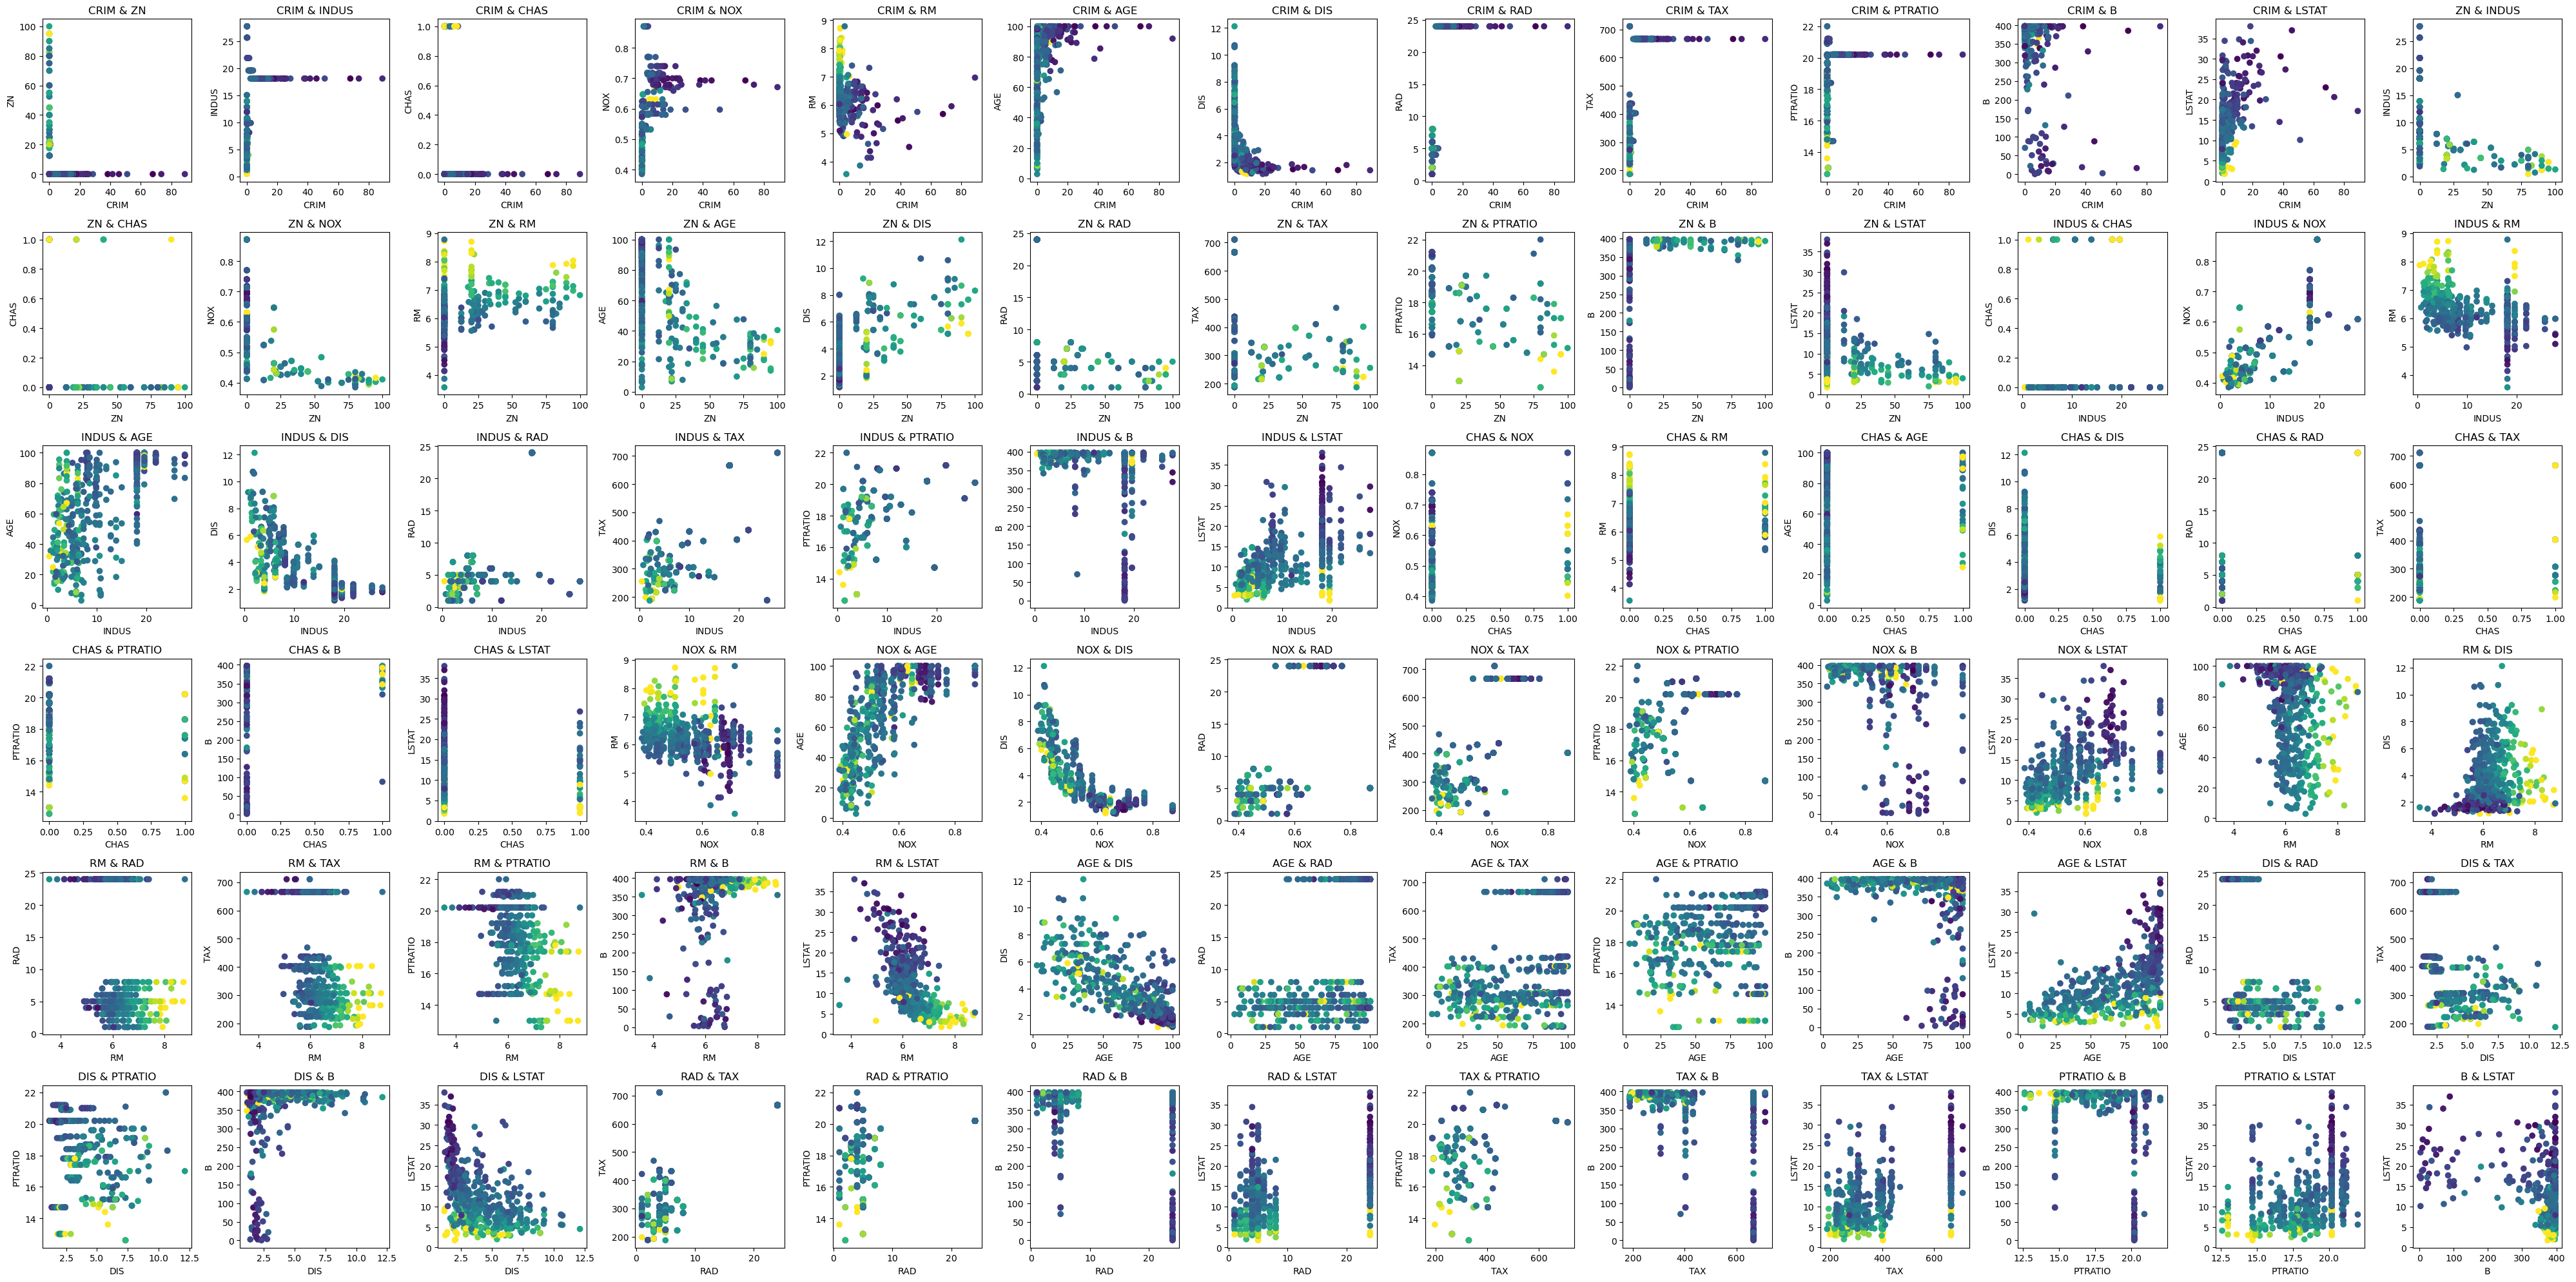

In [5]:
from itertools import combinations
#print(len(list(combinations(hsDF[hsDF.columns[:-1]], 2)))) => 78개
n = 1
plt.figure(figsize=(40, 20))
for l, v in combinations(hsDF[hsDF.columns[:-1]], 2) :
    plt.subplot(6, 13, n)
    plt.scatter(hsDF[l], hsDF[v], c = hsDF['MEDV'])
    plt.title(f'{l} & {v}')
    plt.xlabel(l)
    plt.ylabel(v)
    n += 1
plt.tight_layout()
plt.show()
    

- 타겟 
      - MEDV : median value of owner-occupied homes in $1000s. 소유자가 거주하는 천 달러대 주택의 중간값.(?)
      

- 피처  

      -LSTAT() : lower status of the population (percent).
      
      - RM : average number of rooms per dwelling. 각 주택당 평균 객실 수.

      - PTRATIO : pupil-teacher ratio(비율) by town. 마을별 학생-교사 비율.

In [8]:
# 타겟 - 피처 데이터 분리
featureDF = hsDF[['LSTAT', 'RM', 'PTRATIO']]
targetSR  = hsDF['MEDV']

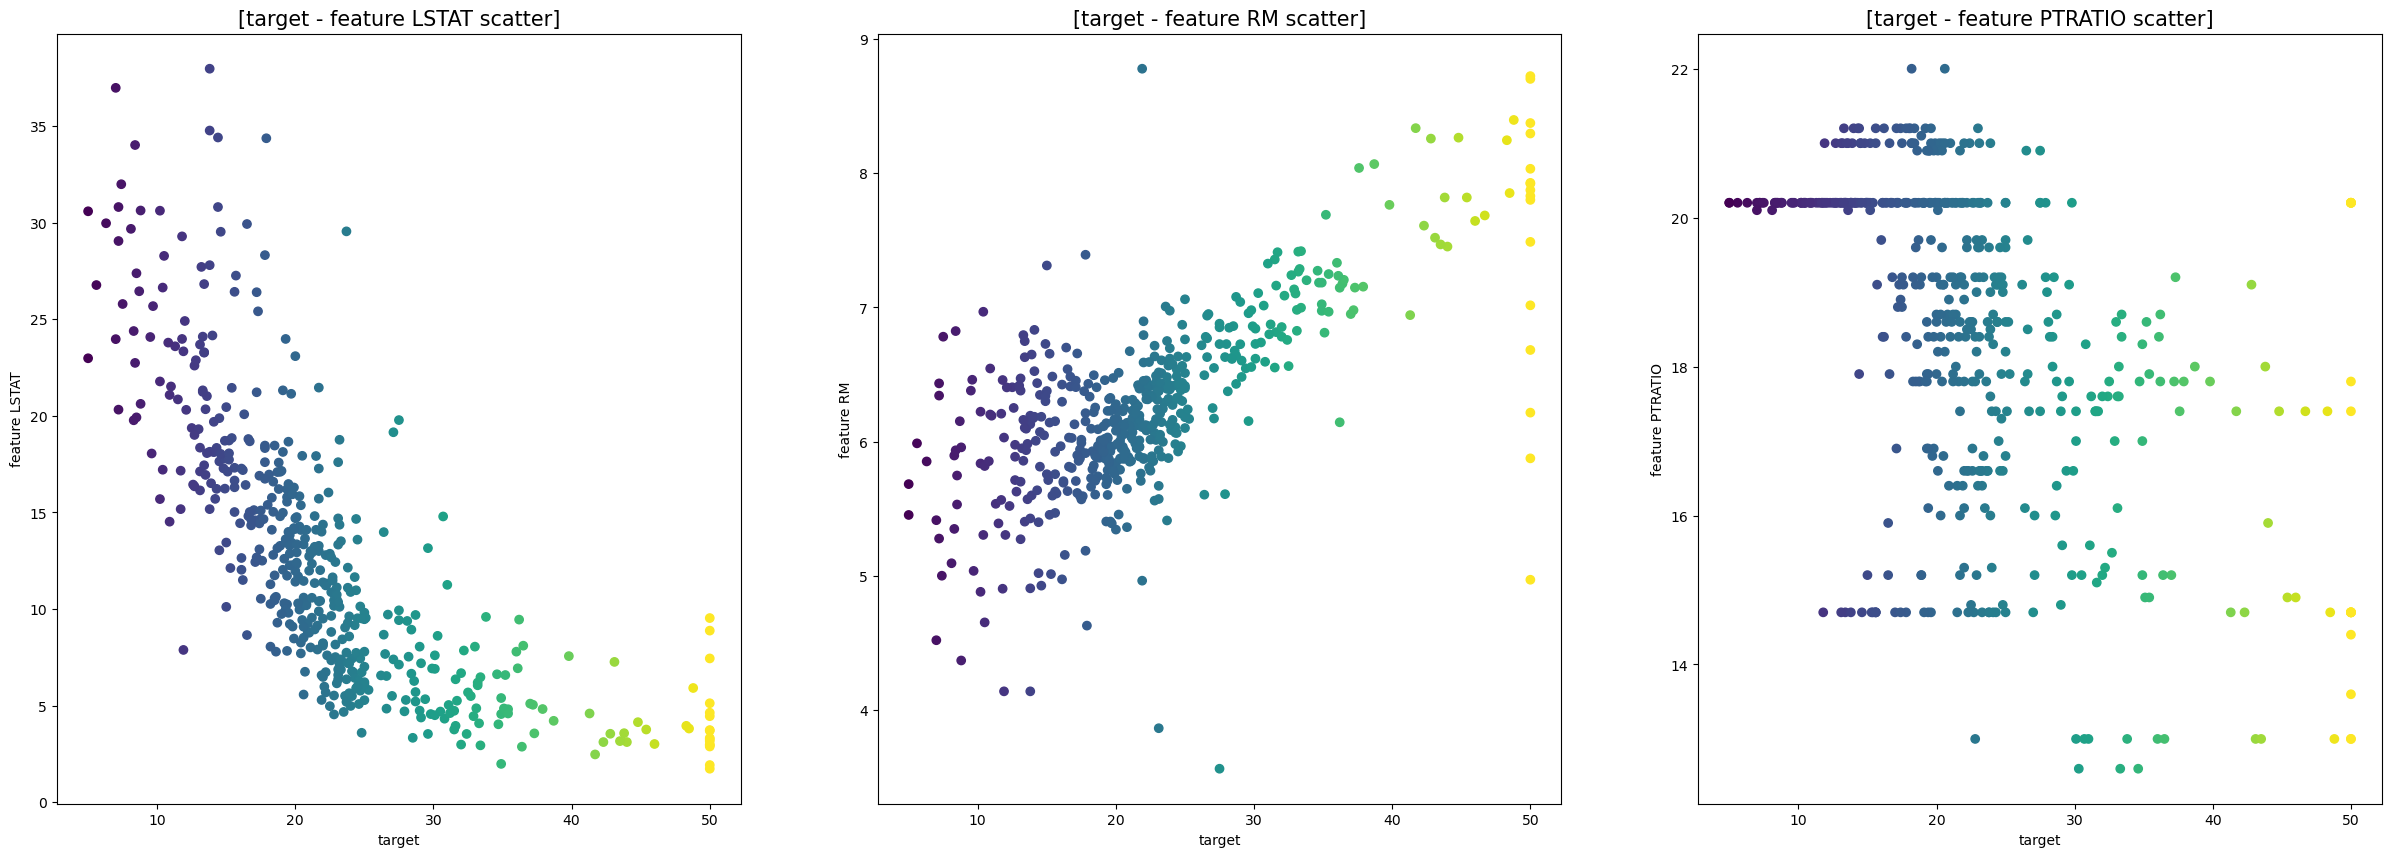

In [9]:
# 타겟 데이터 - 피처 데이터 산포도
plt.figure(figsize=(30,10))
n = 1
for cl in featureDF.columns:
    plt.subplot(1, 3, n)
    plt.scatter(targetSR, featureDF[cl], c= targetSR)
    plt.title(f'[target - feature {cl} scatter]', size=15)
    plt.xlabel('target')
    plt.ylabel(f'feature {cl}')
    n+=1
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
X_trn, X_tst, y_trn, y_tst = train_test_split(featureDF, targetSR, test_size=0.2, random_state= 13)

In [11]:
from sklearn.tree import DecisionTreeRegressor

mdl = DecisionTreeRegressor()
mdl.fit(X_trn, y_trn)
trnScore = mdl.score(X_trn, y_trn)
tstScore = mdl.score(X_tst, y_tst)
print(f'train Score = {trnScore}\ntest Score = {tstScore}')

# random_state =13
#train Score = 0.5384303250818703
#test Score = 0.5278071434824441
#=> 너무 낮음.;;

train Score = 0.5417338371839069
test Score = 0.5278071434824443


In [12]:
# 스케일링 하고 다시 시도.
from sklearn.preprocessing import StandardScaler
stdS = StandardScaler()
stdS.fit(X_trn)
stdS_Xtrn = stdS.transform(X_trn)
stdS_Xtst = stdS.transform(X_tst)

In [13]:
mdl = DecisionTreeRegressor()
mdl.fit(stdS_Xtrn, y_trn)
trnScore = mdl.score(stdS_Xtrn, y_trn)
tstScore = mdl.score(stdS_Xtst, y_tst)
print(f'train Score = {trnScore}\ntest Score = {tstScore}')

train Score = 0.5501675229580487
test Score = 0.5233518188376507


In [14]:
# trnList = []
# tstList = []
# for n in range(1,30) : 
#     mdl = DecisionTreeRegressor()
#     mdl.fit(stdS_Xtrn, y_trn)
#     trnScore = mdl.score(stdS_Xtrn, y_trn)
#     tstScore = mdl.score(stdS_Xtst, y_tst)
#     trnList.append(trnScore)
#     tstList.append(tstList)

# plt.plot(trnList, 'b--', label = 'train')
# plt.plot(tstList, 'r--', label = 'test')
# plt.legend()
# plt.show()

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0) 
cross_val_score(regressor, featureDF, targetSR, cv=12) # 교차검증을 위한 함수.

array([ 0.50049065,  0.13251026,  0.61646577,  0.64220244,  0.05424557,
        0.50715804, -0.16179371,  0.07534178, -0.0725627 , -2.80446981,
       -4.36131838, -0.2396416 ])

In [ ]:
from sklearn.metrics import r2_score
